In [1]:
prices_a = [8.70, 8.91, 8.71]

In [5]:
(prices_a[1]/prices_a[0])-1

0.024137931034482918

In [6]:
(prices_a[2]/prices_a[1])-1

-0.022446689113355678

In [7]:
#calculating the return as a sequence
print(prices_a[1:])
print(prices_a[:-1])


[8.91, 8.71]
[8.7, 8.91]


In [11]:
# doesn't work because of the way python operates on lists
prices_a[1:]/prices_a[:-1]

TypeError: unsupported operand type(s) for /: 'list' and 'list'

In [10]:
#import numpy
import numpy as np

In [18]:
#create a numpy array for the later days
p1 = np.array(prices_a[1:])

In [17]:
#create a numpy array for the former days
p2 = np.array(prices_a[:-1])

In [20]:
#create returns using numpy
(p1/p2)-1

array([ 0.02413793, -0.02244669])

In [22]:
#you can also use pandas
import pandas as pd

In [28]:
#create a dataframe --> creates a matrix of rows and columns
prices = pd.DataFrame({"BLUE":[8.70, 8.91, 8.71, 8.43, 8.73],
                       "ORANGE":[10.66, 11.08, 10.71, 11.59, 12.11]
                      })

In [29]:
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [32]:
prices.iloc[1:]

,BLUE,ORANGE
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [33]:
prices.iloc[:-1]

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59


In [35]:
#this example divides by the column index, which creates this weird result
prices.iloc[1:]/prices.iloc[:-1]

,BLUE,ORANGE
0,NaN,NaN
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,NaN,NaN


In [39]:
# .values just gets the values as an array, which allows for computations on the arrays
# as long as one of the selections doesn't have an index (i.e., .values is used), it will produce the same result
(prices.iloc[1:].values/prices.iloc[:-1])-1

,BLUE,ORANGE
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


In [40]:
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [43]:
#produces a calcualtion by shifting the values by1
(prices/prices.shift(1))-1

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [44]:
#dataframes has a method to compute this directly
prices.pct_change()

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [50]:
#load sample file with prices
prices = pd.read_csv('sample_prices.csv')

In [51]:
import os
print(os.getcwd())

/Users/nicholasflores/Documents/GitHub/data-science-python/finance-ml/finance-ml-data


In [52]:
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [53]:
returns = prices.pct_change()

In [55]:
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


<Axes: >

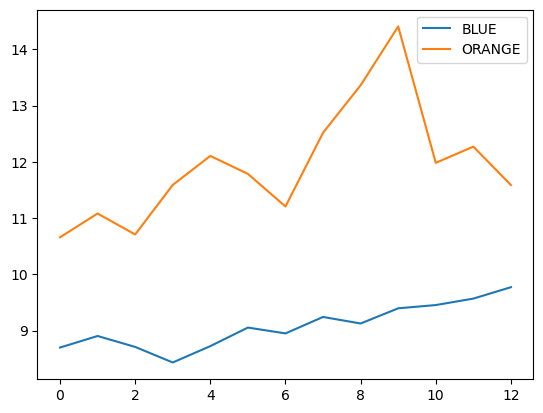

In [57]:
%matplotlib inline
prices.plot()

<Axes: >

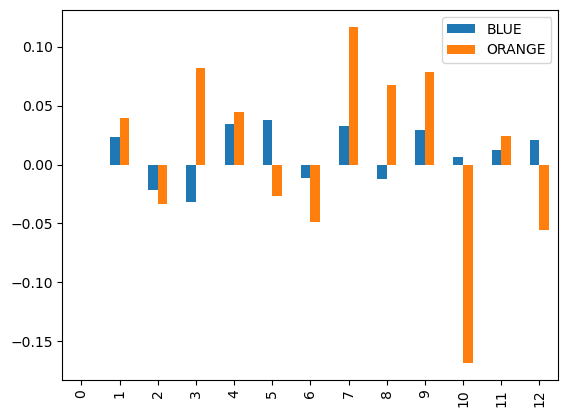

In [59]:
returns.plot.bar()

In [60]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [61]:
returns.head()

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544


In [63]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [64]:
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [66]:
#calculate the total return over the time period
returns+1

,BLUE,ORANGE
0,NaN,NaN
1,1.023621,1.039662
2,0.978193,0.966362
3,0.968237,1.082232
4,1.034477,1.044544
5,1.037786,0.973619
6,0.988548,0.950813
7,1.032676,1.117008
8,0.987419,1.067353
9,1.029581,1.078249


In [69]:
#numpy has a method for computing the returns over a series
np.prod(returns+1)-1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [72]:
#there is another way to compute this using pandas dataframe
#pandas has a product method for computing a series .prod()
(returns+1).prod()-1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [73]:
## Annualization

In [74]:
#monthly return
rm = 0.01

In [75]:
#number of periods
period = 12

In [78]:
#compounded returns over the period
((1+rm)**period)-1

0.12682503013196977

In [79]:
rq = 0.04

In [82]:
((1+rq)**4)-1

0.1698585600000002